In [1]:
suppressMessages(library(tidyverse)) #loading libraries, suppresses warning messages.
suppressMessages(library(tidymodels)) 
suppressMessages(library(repr))
suppressMessages(library(GGally))

set.seed(4747) #setting seed for reproducibility's sake. 47 is hexadecimal for g, and our group number "g47"

In [ ]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
dir.create("data")
download.file(url, "data/top500players.csv") # creates directory "data" and downloads the data used into the folder

### RUN THIS BLOCK ONLY ONCE 

In [2]:
player_data <- read_csv("data/top500players.csv", show_col_types = FALSE)
glimpse(player_data)

New names:
* `` -> ...1



Rows: 500
Columns: 38
$ ...1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1~
$ Age                <chr> "26 (25-04-1993)", "18 (22-12-2001)", "32 (03-11-19~
$ Country            <chr> "Brazil", "United Kingdom", "Slovakia", "Korea, Rep~
$ Plays              <chr> "Right-handed", "Left-handed", "Right-handed", "Rig~
$ Wikipedia          <chr> "Wikipedia", "Wikipedia", "Wikipedia", "Wikipedia",~
$ `Current Rank`     <chr> "378 (97)", "326 (119)", "178 (280)", "236 (199)", ~
$ `Best Rank`        <chr> "363 (04-11-2019)", "316 (14-10-2019)", "44 (14-01-~
$ Name               <chr> "Oscar Jose Gutierrez", "Jack Draper", "Lukas Lacko~
$ Backhand           <chr> NA, "Two-handed", "Two-handed", "Two-handed", "Two-~
$ `Prize Money`      <chr> NA, "$59,040", "US$3,261,567", "$374,093", "US$6,09~
$ Height             <chr> NA, NA, "185 cm", NA, "193 cm", NA, NA, NA, NA, NA,~
$ `Favorite Surface` <chr> NA, NA, "Fast (H, G) 40%", NA, "Fast (H, G) 36%", "~
$ `Turned Pro`    

In [3]:
colnames(player_data) <- make.names(colnames(player_data))
player_data_tidy <- player_data |>
                        separate(Best.Elo.Rank, c("Best.Rank", NA), sep = " ") |> #Removes the date next to the all-time best ranks
                        separate(Current.Elo.Rank, c("Current.Rank", NA), sep = " ") |> #Removes the elo next to the ranks
                        separate(Age, c("Age", NA), sep = " ") |>
                            select(Name, Age, Prize.Money, Seasons, Current.Rank, Best.Rank) |>
                         mutate(Prize.Money = gsub("[a-zA-Z$, -]", "", Prize.Money)) |> #removes all string chars next to numbers, US$ etc.
                         mutate(Prize.Money = as.numeric(Prize.Money)) |>
                         mutate(Best.Rank = as.numeric(Best.Rank)) |>
                         mutate(Current.Rank = as.numeric(Current.Rank)) |>
                         mutate(Age = as.numeric(Age)) |>
                        na.omit()

head(player_data_tidy)

Name,Age,Prize.Money,Seasons,Current.Rank,Best.Rank
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lukas Lacko,32,3261567,14,144,60
Bernard Tomic,27,6091971,11,100,21
Hubert Hurkacz,22,1517157,5,33,33
Sanjar Fayziev,25,122734,5,189,187
Felix Auger Aliassime,19,1893476,3,51,30
Daniil Medvedev,23,10507693,5,5,4


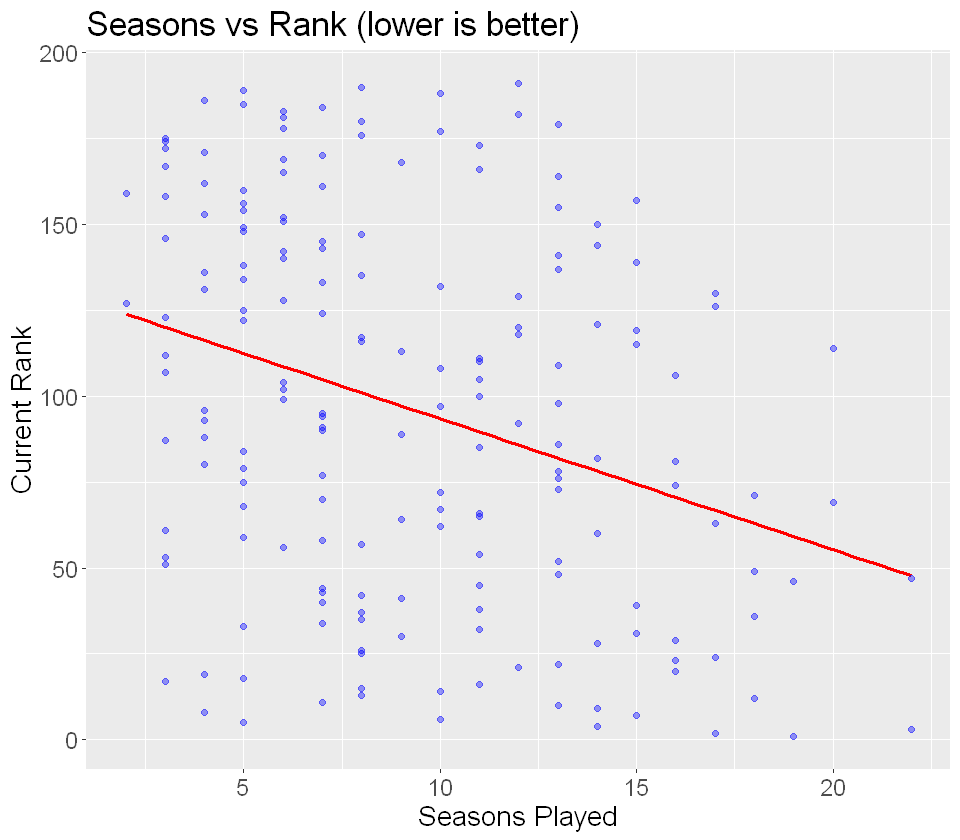

In [4]:
options(repr.plot.length = 10, repr.plot.width = 8)

SeasonsVsRank <- ggplot(player_data_tidy, aes(x = Seasons, y = Current.Rank)) + 
                    geom_smooth(method = "lm", colour = "red", formula = y ~ x, se = FALSE) + #Line of best fit, helps in seeing relationship
                    geom_point(colour = "blue", alpha = 0.4) +
                     labs(x = "Seasons Played", y = "Current Rank", title = "Seasons vs Rank (lower is better)") + 
                     theme(text = element_text(size = 17)) #legend could be added


AgeVsSeasons <- ggplot(player_data_tidy, aes(x = Age, y = Seasons)) + 
                    geom_smooth(method = "lm", colour = "red", formula = y ~ x, se = FALSE) + #Line of best fit, helps in seeing relationship
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Age", y = "Seasons Played", title = "Age vs Seasons") + 
                     theme(text = element_text(size = 17)) #legend could be added


SeasonsVsRank

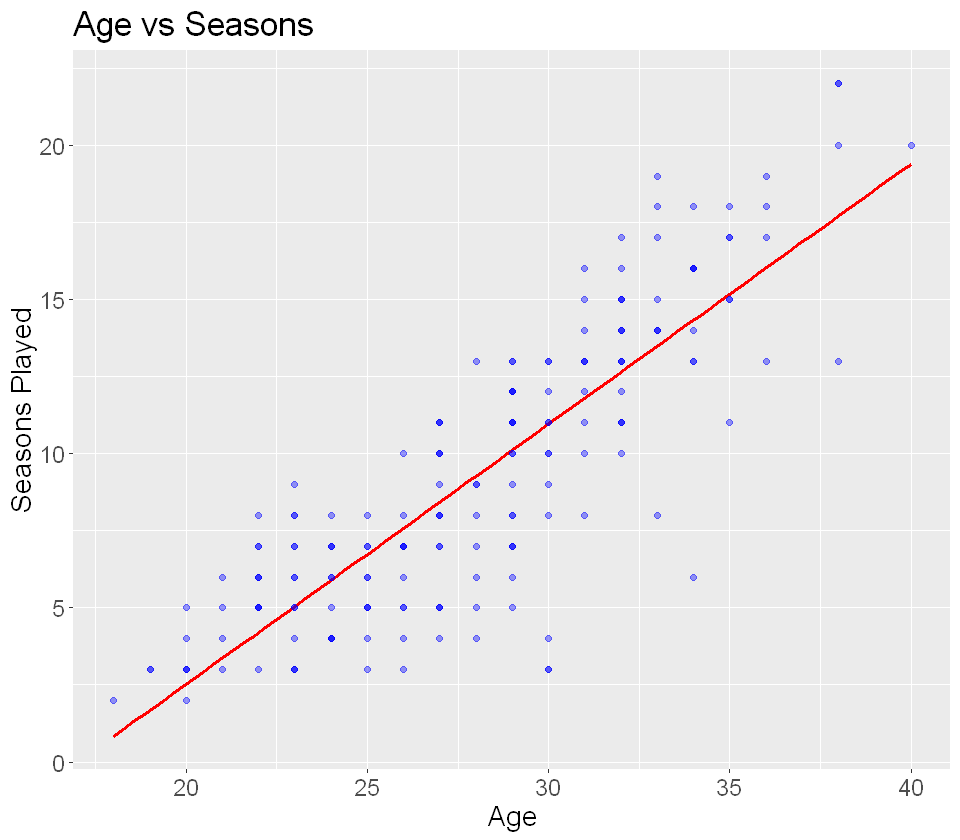

In [5]:
AgeVsSeasons <- ggplot(player_data_tidy, aes(x = Age, y = Seasons)) + 
                    geom_smooth(method = "lm", colour = "red", formula = y ~ x, se = FALSE) + #Line of best fit, helps in seeing relationship
                    geom_point(color = "blue", alpha = 0.4) +
                     labs(x = "Age", y = "Seasons Played", title = "Age vs Seasons") + 
                     theme(text = element_text(size = 17)) #legend could be added

AgeVsSeasons

In [6]:
# cuts Current.Rank and Best.Rank into different intervals with step 20 and adds them to a vector.
## "labels" arg names each interval.
Current_Rank_factor <- player_data_tidy$Current.Rank |>
                            cut(c(0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200), 
                                labels = c("1-20", "21-40", "41-60", "61-80", "81-100",
                                           "101-120", "121-140", "141-160", "161-180", "181-200")) 

Best_Rank_factor <- player_data_tidy$Best.Rank |>
                            cut(c(0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200), 
                                labels = c("1-20", "21-40", "41-60", "61-80", "81-100",
                                           "101-120", "121-140", "141-160", "161-180", "181-200")) 

player_data_factor <- mutate(player_data_tidy, Rank.Range = Current_Rank_factor) |>
                      mutate(Best.Rank.Range = Best_Rank_factor) #vectors are added to df

head(player_data_factor)

Name,Age,Prize.Money,Seasons,Current.Rank,Best.Rank,Rank.Range,Best.Rank.Range
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Lukas Lacko,32,3261567,14,144,60,141-160,41-60
Bernard Tomic,27,6091971,11,100,21,81-100,21-40
Hubert Hurkacz,22,1517157,5,33,33,21-40,21-40
Sanjar Fayziev,25,122734,5,189,187,181-200,181-200
Felix Auger Aliassime,19,1893476,3,51,30,41-60,21-40
Daniil Medvedev,23,10507693,5,5,4,1-20,1-20


In [7]:
set.seed(4747)

player_split <- initial_split(player_data_factor, prop = .80, strata = Best.Rank.Range)
player_training <- training(player_split)
player_testing <- testing(player_split)

player_vfold <- vfold_cv(player_training, v = 5, strata = Best.Rank.Range)

player_recipe <- recipe(Best.Rank.Range ~ Seasons + Prize.Money + Current.Rank, data = player_training) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
    
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

player_resamples_metrics <- workflow() |>
                            add_model(knn_spec) |>
                            add_recipe(player_recipe) |>
                            tune_grid(resamples = player_vfold, grid = k_vals) |>
                            collect_metrics()

resamples_metrics_clean <- player_resamples_metrics |>
                                filter(.metric == "accuracy") |>
                                arrange(desc(mean)) |>
                                slice(1)

! Fold1: internal: No observations were detected in `truth` for level(s): '141-16...

! Fold2: internal: No observations were detected in `truth` for level(s): '61-80'...

! Fold3: internal: No observations were detected in `truth` for level(s): '101-12...

! Fold4: internal: No observations were detected in `truth` for level(s): '181-20...

! Fold5: internal: No observations were detected in `truth` for level(s): '81-100...



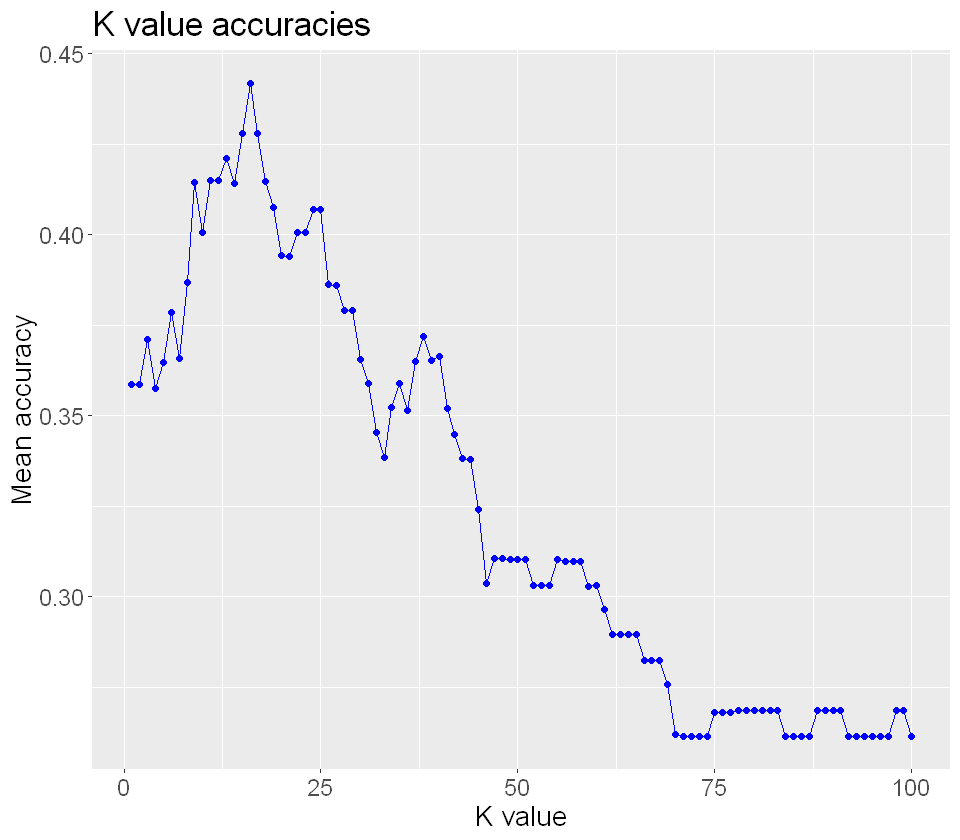

In [8]:
metrics_plot <- player_resamples_metrics |>
                filter(.metric == "accuracy") |>
                    ggplot(aes(x = neighbors, y = mean)) +
                        geom_point(color = "blue") +
                        geom_line(color = "blue") +
                    labs(x = "K value", y = "Mean accuracy", title = "K value accuracies") + 
                        theme(text = element_text(size = 17))

metrics_plot

In [9]:
best_k <- resamples_metrics_clean |>
            select(neighbors) |>
            pull()

paste("K with higest mean accuracy:", best_k, sep = " ")

[1] "K with higest mean accuracy: 16"

In [12]:
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
                set_engine("kknn") |>
                set_mode("classification")

player_predict <- workflow() |>
                add_model(player_spec) |>
                add_recipe(player_recipe) |>
                fit(player_training) |>
                    predict(player_testing) |>
                    bind_cols(player_testing)
head(player_predict)

knn_metrics <- metrics(player_predict, truth = Best.Rank.Range, estimate = .pred_class)
knn_metrics

.pred_class,Name,Age,Prize.Money,Seasons,Current.Rank,Best.Rank,Rank.Range,Best.Rank.Range
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
161-180,Sanjar Fayziev,25,122734,5,189,187,181-200,181-200
21-40,Sam Querrey,32,11912152,15,31,18,21-40,1-20
21-40,Fabio Fognini,32,13470614,16,29,14,21-40,1-20
21-40,Dusan Lajovic,29,4850190,11,65,35,61-80,21-40
121-140,Dennis Novak,26,709278,7,133,115,121-140,101-120
41-60,Roberto Carballes Baena,26,1701922,7,90,90,81-100,81-100


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4736842
kap,multiclass,0.3613445
